In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('Final_Dataset.csv')

In [3]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [4]:
min_scale = MinMaxScaler()
data_min_scaled = min_scale.fit_transform(data)

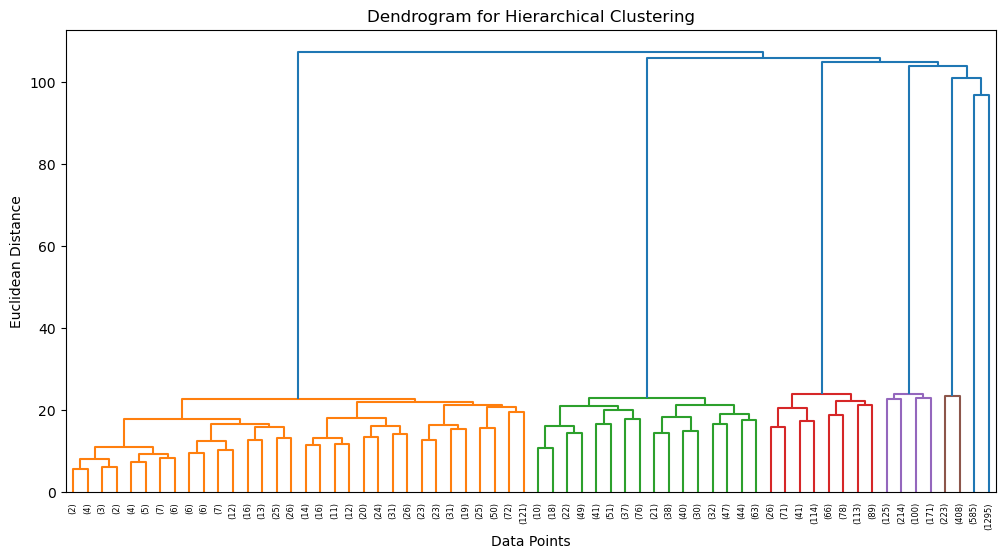

In [5]:
data_scaled_df = pd.DataFrame(data_scaled)

sampled_data = data_scaled_df.sample(n=5000, random_state=42).values

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(
    sch.linkage(sampled_data, method='ward'),
    truncate_mode='level',
    p=5 
)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38832 entries, 0 to 38831
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               38832 non-null  int64  
 1   Education                38832 non-null  int64  
 2   Income                   38832 non-null  float64
 3   Recency                  38832 non-null  int64  
 4   MntWines                 38832 non-null  int64  
 5   MntFruits                38832 non-null  int64  
 6   MntMeatProducts          38832 non-null  int64  
 7   MntFishProducts          38832 non-null  int64  
 8   MntSweetProducts         38832 non-null  int64  
 9   MntGoldProds             38832 non-null  int64  
 10  NumDealsPurchases        38832 non-null  int64  
 11  NumWebPurchases          38832 non-null  int64  
 12  NumCatalogPurchases      38832 non-null  int64  
 13  NumStorePurchases        38832 non-null  int64  
 14  NumWebVisitsMonth     

In [7]:
drop_cols = ['Z_CostContact','Z_Revenue','Unnamed: 0']
for col in drop_cols:
    data.drop(col,axis = 1,inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38832 entries, 0 to 38831
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education                38832 non-null  int64  
 1   Income                   38832 non-null  float64
 2   Recency                  38832 non-null  int64  
 3   MntWines                 38832 non-null  int64  
 4   MntFruits                38832 non-null  int64  
 5   MntMeatProducts          38832 non-null  int64  
 6   MntFishProducts          38832 non-null  int64  
 7   MntSweetProducts         38832 non-null  int64  
 8   MntGoldProds             38832 non-null  int64  
 9   NumDealsPurchases        38832 non-null  int64  
 10  NumWebPurchases          38832 non-null  int64  
 11  NumCatalogPurchases      38832 non-null  int64  
 12  NumStorePurchases        38832 non-null  int64  
 13  NumWebVisitsMonth        38832 non-null  int64  
 14  Complain              

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
import seaborn as sns

normal = Normalizer()
df_nm = normal.fit_transform(data)

pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_nm)

In [10]:
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = hc.fit_predict(df_pca)

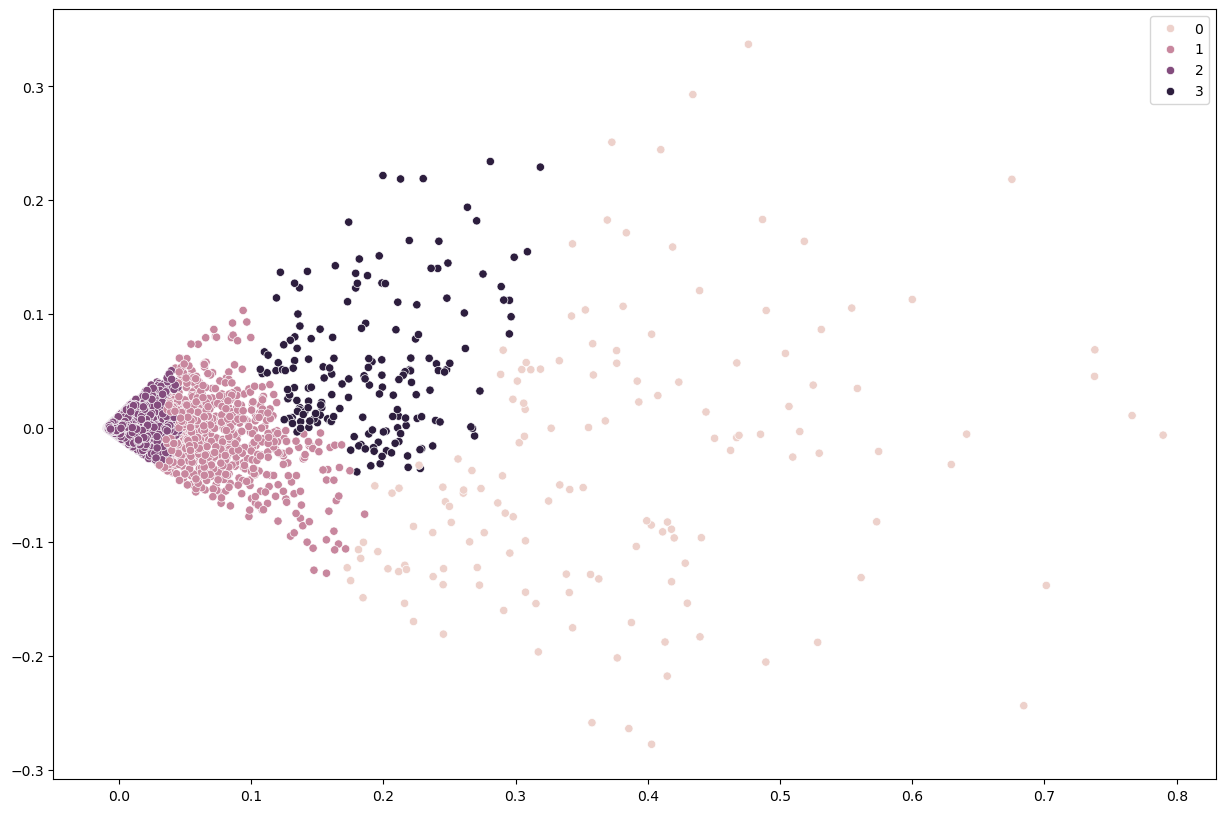

In [11]:
plt.figure(figsize = (15,10))
sns.scatterplot(x =df_pca[:,0], y= df_pca[:,1], hue = labels)
plt.show()

<Figure size 1500x1000 with 0 Axes>

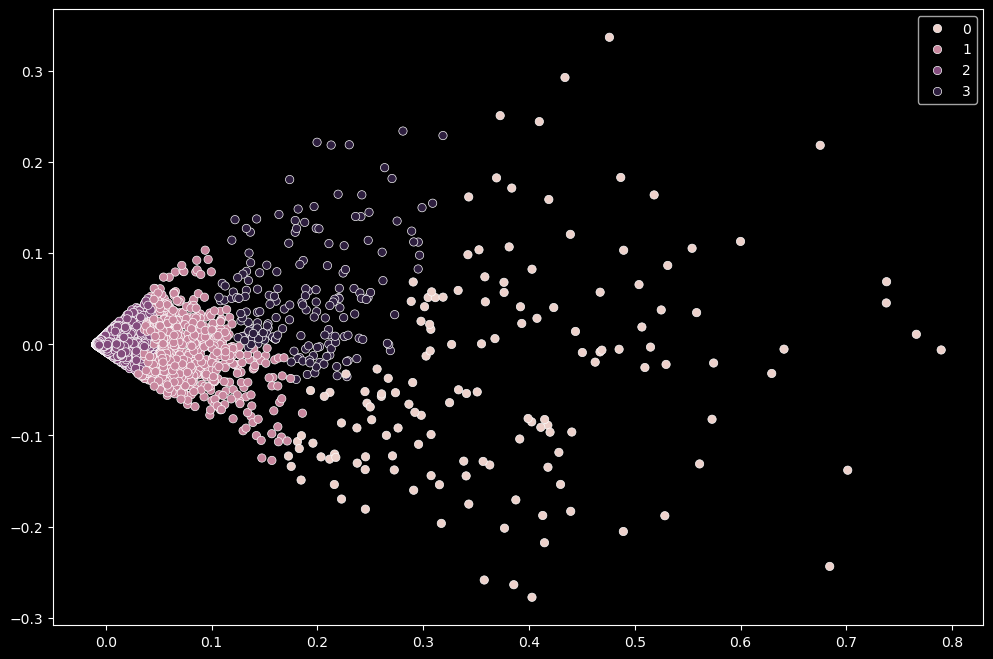

In [12]:
df_pca = np.array(df_pca)
plt.figure(figsize = (15,10))
plt.style.use("dark_background")
plt.figure(figsize=(12, 8), facecolor="black")
sns.scatterplot(x =df_pca[:,0], y= df_pca[:,1], hue = labels)
plt.show()

In [13]:
silhouette = silhouette_score(df_pca, labels)
print(f"Silhouette Score: {silhouette:.4f}")

Silhouette Score: 0.8910


In [15]:
import pickle
with open("hierarchical_model.pkl", "wb") as model_file:
    pickle.dump(hc, model_file)